In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis=1)
y = df["Sales"]

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LGBMRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2Score = r2_score(y_test, y_pred)
meanAbsScore = mean_absolute_error(y_test, y_pred)
meanSqScore = mean_squared_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)

end_time = time.time()

print("R2:" + str(r2Score))
print("Mean Absolute Error:" + str(meanAbsScore))
print("Mean Squared Error:" + str(meanSqScore))
print("MAPE:" + str(MAPE))
elapsed_time = end_time - start_time
print("Elapsed Time: ", elapsed_time, " seconds")

R2:0.6119519768073103
Mean Absolute Error:548.8946743254953
Mean Squared Error:609196.81025887
MAPE:0.3976132135326502
Elapsed Time:  0.019968509674072266  seconds


In [35]:
# K-fold

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis = 1)
y = df["Sales"]

start_time = time.time()

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

r2_scores = []
mae_scores = []
mse_scores = []
mape_scores = []
elapsed_times = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model = LGBMRegressor().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2Score = r2_score(y_test, y_pred)
    meanAbsScore = mean_absolute_error(y_test, y_pred)
    meanSqScore = mean_squared_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    
    r2_scores.append(r2Score)
    mae_scores.append(meanAbsScore)
    mse_scores.append(meanSqScore)
    mape_scores.append(MAPE)
    

mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_mape = np.mean(mape_scores)

end_time = time.time()

print("R2 Scores:", mean_r2)
print("Mean Absolute Error Scores:", mean_mae)
print("Mean Squared Error Scores:", mean_mse)
print("MAPE Scores:", mean_mape)

elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

R2 Scores: 0.7047242944658944
Mean Absolute Error Scores: 476.0448610068587
Mean Squared Error Scores: 437290.8281224355
MAPE Scores: 0.3482051174532626
Elapsed Time: 0.20938539505004883 seconds


In [1]:
# K-fold and Parameter Optimizations

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis=1)
y = df["Sales"]

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

learning_rate_values = [0.001, 0.01, 0.1, 0.5]
max_depth_values = [2, 3, 5, 8, 10]
n_estimators_values = [100, 200, 500, 1000]
colsample_bytree_values = [0.4, 0.7, 0.8, 1]

max_mean_r2 = -np.inf
best_LearningRate = -1
best_Depth = -1
best_Estimator = -1
best_Colsample = -1

start_time = time.time()

for learning in learning_rate_values:
    for depth in max_depth_values:
        for estimator in n_estimators_values:
            for colsample in colsample_bytree_values:
                
                r2_scores = []
                mae_scores = []
                mse_scores = []
                mape_scores = []

                for train_idx, test_idx in kf.split(X):
                    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                    model = LGBMRegressor(learning_rate=learning, n_estimators=estimator, max_depth=depth, colsample_bytree=colsample).fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    r2Score = r2_score(y_test, y_pred)
                    meanAbsScore = mean_absolute_error(y_test, y_pred)
                    meanSqScore = mean_squared_error(y_test, y_pred)
                    MAPE = mean_absolute_percentage_error(y_test, y_pred)

                    r2_scores.append(r2Score)
                    mae_scores.append(meanAbsScore)
                    mse_scores.append(meanSqScore)
                    mape_scores.append(MAPE)

                mean_r2 = np.mean(r2_scores)

                if mean_r2 > max_mean_r2:
                    max_mean_r2 = mean_r2
                    best_LearningRate = learning
                    best_Depth = depth
                    best_Estimator = estimator
                    best_Colsample = colsample
                

        
end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed Time:", elapsed_time, "seconds")
print("Best Learning Rate:", best_LearningRate)
print("Best Depth:", best_Depth)
print("Best Estimator:", best_Estimator)
print("Best Colsample by Tree:", best_Colsample)

print("Max Mean R2 Score:", max_mean_r2)

Elapsed Time: 215.36440324783325 seconds
Best Learning Rate: 0.1
Best Depth: 2
Best Estimator: 200
Best Colsample by Tree: 0.7
Max Mean R2 Score: 0.7164867042362112


Elapsed Time: 221.3003191947937 seconds
Best Learning Rate: 0.1
Best Depth: 2
Best Estimator: 100
Best Colsample by Tree: 0.4
Max Mean R2 Score: 0.7157771208375033


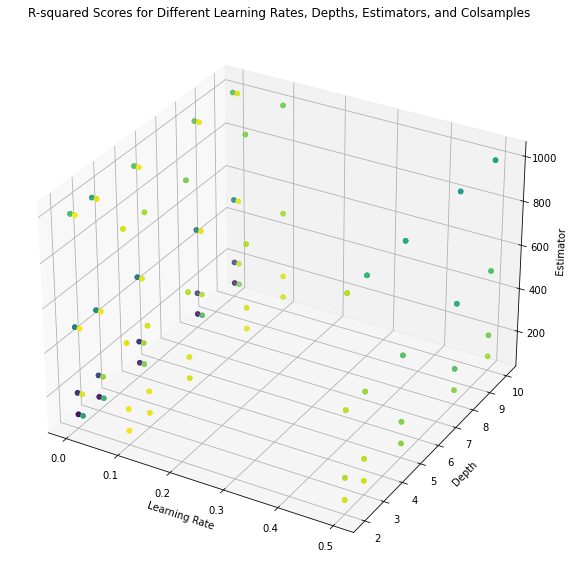

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis=1)
y = df["Sales"]

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

learning_rate_values = [0.001, 0.01, 0.1, 0.5]
max_depth_values = [2, 3, 5, 8, 10]
n_estimators_values = [100, 200, 500, 1000]
colsample_bytree_values = [0.4, 0.7, 0.8, 1]

max_mean_r2 = -np.inf
best_learning_rate = -1
best_depth = -1
best_estimator = -1
best_colsample = -1

r2_scores = []

start_time = time.time()

for learning_rate in learning_rate_values:
    for depth in max_depth_values:
        for estimator in n_estimators_values:
            for colsample in colsample_bytree_values:
                
                mean_r2_scores = []
                
                for train_idx, test_idx in kf.split(X):
                    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                    
                    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=estimator, max_depth=depth, colsample_bytree=colsample)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    
                    r2_score_val = r2_score(y_test, y_pred)
                    mean_r2_scores.append(r2_score_val)
                
                mean_r2 = np.mean(mean_r2_scores)
                r2_scores.append([learning_rate, depth, estimator, colsample, mean_r2])
                
                if mean_r2 > max_mean_r2:
                    max_mean_r2 = mean_r2
                    best_learning_rate = learning_rate
                    best_depth = depth
                    best_estimator = estimator
                    best_colsample = colsample

end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed Time:", elapsed_time, "seconds")
print("Best Learning Rate:", best_learning_rate)
print("Best Depth:", best_depth)
print("Best Estimator:", best_estimator)
print("Best Colsample by Tree:", best_colsample)
print("Max Mean R2 Score:", max_mean_r2)

r2_scores = np.array(r2_scores)
learning_rates = r2_scores[:, 0]
depths = r2_scores[:, 1]
estimators = r2_scores[:, 2]
colsamples = r2_scores[:, 3]
r2_values = r2_scores[:, 4]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(learning_rates, depths, estimators, c=r2_values, cmap='viridis')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Depth')
ax.set_zlabel('Estimator')
ax.set_title('R-squared Scores for Different Learning Rates, Depths, Estimators, and Colsamples')
plt.show()

Elapsed Time: 340.06710958480835 seconds
Best Learning Rate: 0.1
Best Depth: 2
Best Estimator: 100
Best Colsample by Tree: 0.7
Max Mean R2 Score: 0.7207128271022694


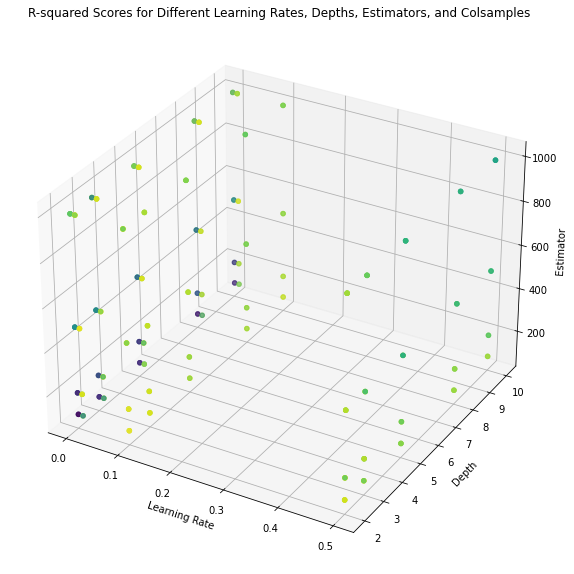

In [2]:
# Feature Importance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

df = df.drop('Month', axis=1)
df = df.drop('Gold', axis=1)
df = df.drop('School', axis=1)
df = df.drop('Work', axis=1)
df = df.drop('CPI', axis=1)
df = df.drop('Unemployment', axis=1)
df = df.drop('Weather', axis=1)

X = df.drop(["Sales"], axis=1)
y = df["Sales"]

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

learning_rate_values = [0.001, 0.01, 0.1, 0.5]
max_depth_values = [2, 3, 5, 8, 10]
n_estimators_values = [100, 200, 500, 1000]
colsample_bytree_values = [0.4, 0.7, 0.8, 1]

max_mean_r2 = -np.inf
best_learning_rate = -1
best_depth = -1
best_estimator = -1
best_colsample = -1

r2_scores = []

start_time = time.time()

for learning_rate in learning_rate_values:
    for depth in max_depth_values:
        for estimator in n_estimators_values:
            for colsample in colsample_bytree_values:
                
                mean_r2_scores = []
                
                for train_idx, test_idx in kf.split(X):
                    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                    
                    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=estimator, max_depth=depth, colsample_bytree=colsample)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    
                    r2_score_val = r2_score(y_test, y_pred)
                    mean_r2_scores.append(r2_score_val)
                
                mean_r2 = np.mean(mean_r2_scores)
                r2_scores.append([learning_rate, depth, estimator, colsample, mean_r2])
                
                if mean_r2 > max_mean_r2:
                    max_mean_r2 = mean_r2
                    best_learning_rate = learning_rate
                    best_depth = depth
                    best_estimator = estimator
                    best_colsample = colsample

end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed Time:", elapsed_time, "seconds")
print("Best Learning Rate:", best_learning_rate)
print("Best Depth:", best_depth)
print("Best Estimator:", best_estimator)
print("Best Colsample by Tree:", best_colsample)
print("Max Mean R2 Score:", max_mean_r2)

r2_scores = np.array(r2_scores)
learning_rates = r2_scores[:, 0]
depths = r2_scores[:, 1]
estimators = r2_scores[:, 2]
colsamples = r2_scores[:, 3]
r2_values = r2_scores[:, 4]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(learning_rates, depths, estimators, c=r2_values, cmap='viridis')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Depth')
ax.set_zlabel('Estimator')
ax.set_title('R-squared Scores for Different Learning Rates, Depths, Estimators, and Colsamples')
plt.show()

Elapsed Time: 236.49707341194153 seconds
Best Learning Rate: 0.01
Best Depth: 3
Best Estimator: 500
Best Colsample by Tree: 0.8
Max Mean R2 Score: 0.7155236734079262
MAE: 610.7117308711935
MSE: 677729.6143771028
RMSE: 801.0882167913308


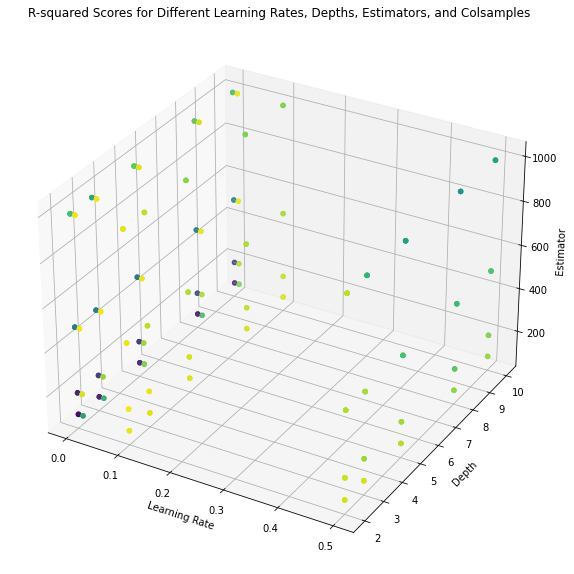

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis=1)
y = df["Sales"]

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

learning_rate_values = [0.001, 0.01, 0.1, 0.5]
max_depth_values = [2, 3, 5, 8, 10]
n_estimators_values = [100, 200, 500, 1000]
colsample_bytree_values = [0.4, 0.7, 0.8, 1]

max_mean_r2 = -np.inf
best_learning_rate = -1
best_depth = -1
best_estimator = -1
best_colsample = -1

r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []

start_time = time.time()

for learning_rate in learning_rate_values:
    for depth in max_depth_values:
        for estimator in n_estimators_values:
            for colsample in colsample_bytree_values:
                
                mean_r2_scores = []
                mean_mae_scores = []
                mean_mse_scores = []
                mean_rmse_scores = []
                
                for train_idx, test_idx in kf.split(X):
                    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                    
                    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=estimator, max_depth=depth, colsample_bytree=colsample)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    
                    r2_score_val = r2_score(y_test, y_pred)
                    mean_r2_scores.append(r2_score_val)
                    mean_mae_scores.append(mean_absolute_error(y_test, y_pred))
                    mean_mse_scores.append(mean_squared_error(y_test, y_pred))
                    mean_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
                
                mean_r2 = np.mean(mean_r2_scores)
                mean_mae = np.mean(mean_mae_scores)
                mean_mse = np.mean(mean_mse_scores)
                mean_rmse = np.mean(mean_rmse_scores)
                
                r2_scores.append([learning_rate, depth, estimator, colsample, mean_r2])
                mae_scores.append([learning_rate, depth, estimator, colsample, mean_mae])
                mse_scores.append([learning_rate, depth, estimator, colsample, mean_mse])
                rmse_scores.append([learning_rate, depth, estimator, colsample, mean_rmse])
                
                if mean_r2 > max_mean_r2:
                    max_mean_r2 = mean_r2
                    best_learning_rate = learning_rate
                    best_depth = depth
                    best_estimator = estimator
                    best_colsample = colsample

end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed Time:", elapsed_time, "seconds")
print("Best Learning Rate:", best_learning_rate)
print("Best Depth:", best_depth)
print("Best Estimator:", best_estimator)
print("Best Colsample by Tree:", best_colsample)
print("Max Mean R2 Score:", max_mean_r2)

r2_scores = np.array(r2_scores)
mae_scores = np.array(mae_scores)
mse_scores = np.array(mse_scores)
rmse_scores = np.array(rmse_scores)

print("MAE:", np.mean(mae_scores[:, 4]))
print("MSE:", np.mean(mse_scores[:, 4]))
print("RMSE:", np.mean(rmse_scores[:, 4]))

learning_rates = r2_scores[:, 0]
depths = r2_scores[:, 1]
estimators = r2_scores[:, 2]
colsamples = r2_scores[:, 3]
r2_values = r2_scores[:, 4]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(learning_rates, depths, estimators, c=r2_values, cmap='viridis')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Depth')
ax.set_zlabel('Estimator')
ax.set_title('R-squared Scores for Different Learning Rates, Depths, Estimators, and Colsamples')
plt.show()

Elapsed Time: 203.16585779190063 seconds
Best Learning Rate: 0.01
Best Depth: 3
Best Estimator: 500
Best Colsample by Tree: 0.7
Max Mean R2 Score: 0.7160684252579916


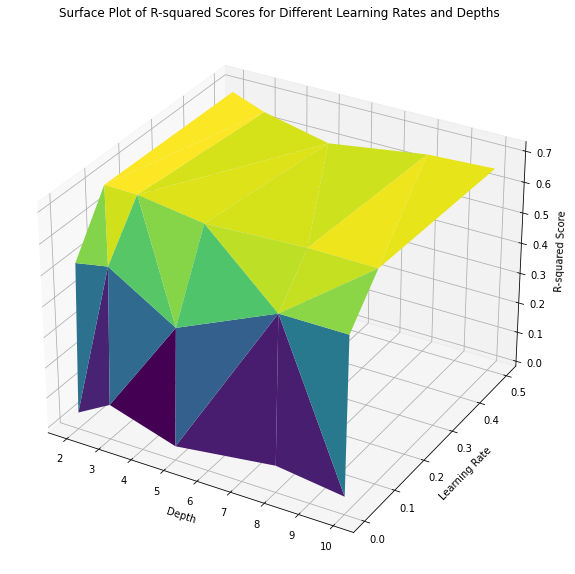

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis=1)
y = df["Sales"]

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

learning_rate_values = [0.001, 0.01, 0.1, 0.5]
max_depth_values = [2, 3, 5, 8, 10]
n_estimators_values = [100, 200, 500, 1000]
colsample_bytree_values = [0.4, 0.7, 0.8, 1]

max_mean_r2 = -np.inf
best_learning_rate = -1
best_depth = -1
best_estimator = -1
best_colsample = -1

r2_scores = []

start_time = time.time()

for learning_rate in learning_rate_values:
    for depth in max_depth_values:
        for estimator in n_estimators_values:
            for colsample in colsample_bytree_values:
                
                mean_r2_scores = []
                
                for train_idx, test_idx in kf.split(X):
                    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                    
                    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=estimator, max_depth=depth, colsample_bytree=colsample)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    
                    r2_score_val = r2_score(y_test, y_pred)
                    mean_r2_scores.append(r2_score_val)
                
                mean_r2 = np.mean(mean_r2_scores)
                r2_scores.append([learning_rate, depth, estimator, colsample, mean_r2])
                
                if mean_r2 > max_mean_r2:
                    max_mean_r2 = mean_r2
                    best_learning_rate = learning_rate
                    best_depth = depth
                    best_estimator = estimator
                    best_colsample = colsample

end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed Time:", elapsed_time, "seconds")
print("Best Learning Rate:", best_learning_rate)
print("Best Depth:", best_depth)
print("Best Estimator:", best_estimator)
print("Best Colsample by Tree:", best_colsample)
print("Max Mean R2 Score:", max_mean_r2)

r2_scores = np.array(r2_scores)
learning_rates = r2_scores[:, 0]
depths = r2_scores[:, 1]
estimators = r2_scores[:, 2]
colsamples = r2_scores[:, 3]
r2_values = r2_scores[:, 4]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(depths, learning_rates, r2_values, cmap='viridis')
ax.set_xlabel('Depth')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('R-squared Score')
ax.set_title('Surface Plot of R-squared Scores for Different Learning Rates and Depths')
plt.show()

Elapsed Time: 12.307647943496704 seconds
Best Estimator: 100
Best Colsample by Tree: 0.4
Max Mean R2 Score: 0.6982481588885497


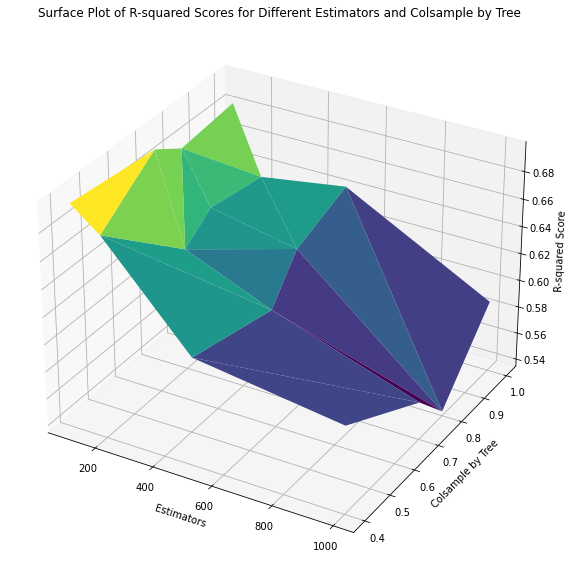

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import time

df = pd.read_excel("satisverileri.xlsx")
df.dropna(inplace=True)

X = df.drop(["Sales"], axis=1)
y = df["Sales"]

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)

estimator_values = [100, 200, 500, 1000]
colsample_bytree_values = [0.4, 0.7, 0.8, 1]

max_mean_r2 = -np.inf
best_estimator = -1
best_colsample = -1

r2_scores = []

start_time = time.time()

for estimator in estimator_values:
    for colsample in colsample_bytree_values:
        mean_r2_scores = []
        
        for train_idx, test_idx in kf.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            model = LGBMRegressor(n_estimators=estimator, colsample_bytree=colsample)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            r2_score_val = r2_score(y_test, y_pred)
            mean_r2_scores.append(r2_score_val)
        
        mean_r2 = np.mean(mean_r2_scores)
        r2_scores.append([estimator, colsample, mean_r2])
        
        if mean_r2 > max_mean_r2:
            max_mean_r2 = mean_r2
            best_estimator = estimator
            best_colsample = colsample

end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed Time:", elapsed_time, "seconds")
print("Best Estimator:", best_estimator)
print("Best Colsample by Tree:", best_colsample)
print("Max Mean R2 Score:", max_mean_r2)

r2_scores = np.array(r2_scores)
estimators = r2_scores[:, 0]
colsamples = r2_scores[:, 1]
r2_values = r2_scores[:, 2]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(estimators, colsamples, r2_values, cmap='viridis')
ax.set_xlabel('Estimators')
ax.set_ylabel('Colsample by Tree')
ax.set_zlabel('R-squared Score')
ax.set_title('Surface Plot of R-squared Scores for Different Estimators and Colsample by Tree')
plt.show()